In [3]:
import numpy as np
from numba import jit
import matplotlib as plt 


In [4]:
plt.rcParams.update({'font.size': 14})

In [5]:

# Parámetros del modelo
L = 6  # Tamaño de la red (6x6)
T = 2.0  # Temperatura
beta = 1 / T  # Beta = 1/kT
J = 1  # Interacción de intercambio

# Inicialización de la red de espines aleatoria
spins = np.random.choice([-1, 1], size=(L, L))

# Función para calcular la energía local de un espín con sus vecinos
def local_energy(spins, i, j):
    return -J * spins[i, j] * (spins[i, (j+1) % L] + spins[i, (j-1) % L] +
                               spins[(i+1) % L, j] + spins[(i-1) % L, j])

# Algoritmo de Markov-Ising
def markov_ising(spins, E):
    # Elegir un espín aleatorio
    i, j = np.random.randint(0, L, size=2)
    
    # Calcular la energía antes y después del flip
    dE = -2 * local_energy(spins, i, j)  # Cambio de energía al voltear el espín
    
    # Regla de aceptación de Metropolis
    if dE < 0 or np.random.rand() < np.exp(-beta * dE):
        spins[i, j] *= -1  # Flip del espín
        E += dE  # Actualizar la energía total
    
    return spins, E

# Ejemplo de uso:
E = 0  # Inicializar energía, podrías calcularla según sea necesario
for _ in range(100):  # 100 iteraciones del algoritmo de Markov-Ising
    spins, E = markov_ising(spins, E)

print("Espines después del algoritmo de Markov-Ising:", spins)
print("Energía total:", E)


Espines después del algoritmo de Markov-Ising: [[ 1  1  1  1  1  1]
 [ 1  1  1  1 -1  1]
 [ 1  1  1  1  1  1]
 [ 1  1  1 -1  1  1]
 [ 1  1  1  1  1  1]
 [ 1  1  1  1  1  1]]
Energía total: -60


T = 0.50, Energía promedio por espín = -2.0000, c_v = 0.0000
T = 1.00, Energía promedio por espín = -1.9980, c_v = 0.0004
T = 1.50, Energía promedio por espín = -1.9514, c_v = 0.0055
T = 2.00, Energía promedio por espín = -1.7401, c_v = 0.0193
T = 2.50, Energía promedio por espín = -1.2793, c_v = 0.0275
T = 3.00, Energía promedio por espín = -0.8878, c_v = 0.0156
T = 3.50, Energía promedio por espín = -0.6872, c_v = 0.0082
T = 4.00, Energía promedio por espín = -0.5740, c_v = 0.0053


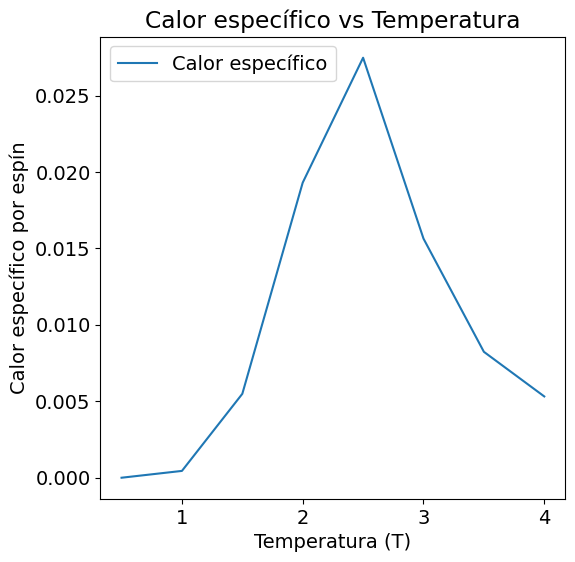

In [9]:


# Parámetros
L = 6  # Tamaño de la red (6x6)
J = 1  # Interacción de intercambio
N_sweeps = 5000  # Número de sweeps para equilibrar y tomar muestras
temperaturas = np.arange(0.5, 4.5, 0.5)  # Rango de temperaturas de 0.5 a 4.0 en pasos de 0.5

# Inicialización de la red de espines aleatoria
def inicializar_red(L):
    return np.random.choice([-1, 1], size=(L, L))

# Función para calcular la energía local de un espín con sus vecinos
def local_energy(spins, i, j):
    return -J * spins[i, j] * (spins[i, (j+1) % L] + spins[i, (j-1) % L] +
                               spins[(i+1) % L, j] + spins[(i-1) % L, j])

# Función para calcular la energía total de la red
def total_energy(spins):
    energy = 0
    for i in range(L):
        for j in range(L):
            energy += local_energy(spins, i, j)
    return energy / 2  # Evitar contar dos veces cada enlace

# Algoritmo de Metropolis-Hastings
def metropolis(spins, T):
    beta = 1 / T
    E = total_energy(spins)
    for _ in range(L**2):  # Intentos por sweep
        i, j = np.random.randint(0, L, size=2)
        dE = -2 * local_energy(spins, i, j)  # Cambio de energía al voltear el espín
        if dE < 0 or np.random.rand() < np.exp(-beta * dE):
            spins[i, j] *= -1  # Flip del espín
            E += dE  # Actualizar la energía total
    return spins, E

# Medir energía y calor específico
def medir_energia_calor_especifico(L, N_sweeps, temperaturas):
    energia_promedio = []
    calor_especifico = []

    for T in temperaturas:
        spins = inicializar_red(L)
        beta = 1 / T
        
        # Fase de equilibración
        for _ in range(1000 * L**2):  # Aumentar los sweeps de equilibración
            spins, _ = metropolis(spins, T)
        
        # Mediciones
        energy_accum = 0
        energy_sq_accum = 0
        
        for _ in range(N_sweeps):
            spins, E = metropolis(spins, T)
            energy_accum += E / (L**2)  # Dividir por el número de espines
            energy_sq_accum += (E / (L**2))**2  # Cuadrado de la energía por espín
        
        # Cálculo de los promedios (teniendo en cuenta el número de spins L^2)
        E_avg = energy_accum / N_sweeps  # Energía promedio por espín
        E_sq_avg = energy_sq_accum / N_sweeps  # Cuadrado de la energía promedio por espín
        
        # Cálculo intermedio para diagnósticos
        #print(f"T = {T:.2f}, E_avg = {E_avg:.4f}, E_sq_avg = {E_sq_avg:.4f}, beta = {beta:.4f}")
        
        # Calor específico por espín (teniendo en cuenta el número de spins L^2)
        c_v = (beta**2) * (E_sq_avg - E_avg**2)
        
        energia_promedio.append(E_avg)
        calor_especifico.append(c_v)
    
    return energia_promedio, calor_especifico

# Ejecutar las simulaciones
energia_promedio, calor_especifico = medir_energia_calor_especifico(L, N_sweeps, temperaturas)

# Mostrar los resultados
for i, T in enumerate(temperaturas):
    print(f"T = {T:.2f}, Energía promedio por espín = {energia_promedio[i]:.4f}, c_v = {calor_especifico[i]:.4f}")

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.plot(temperaturas, calor_especifico, label='Calor específico')
plt.xlabel('Temperatura (T)')
plt.ylabel('Calor específico por espín')
plt.title('Calor específico vs Temperatura')
plt.legend()
plt.show()




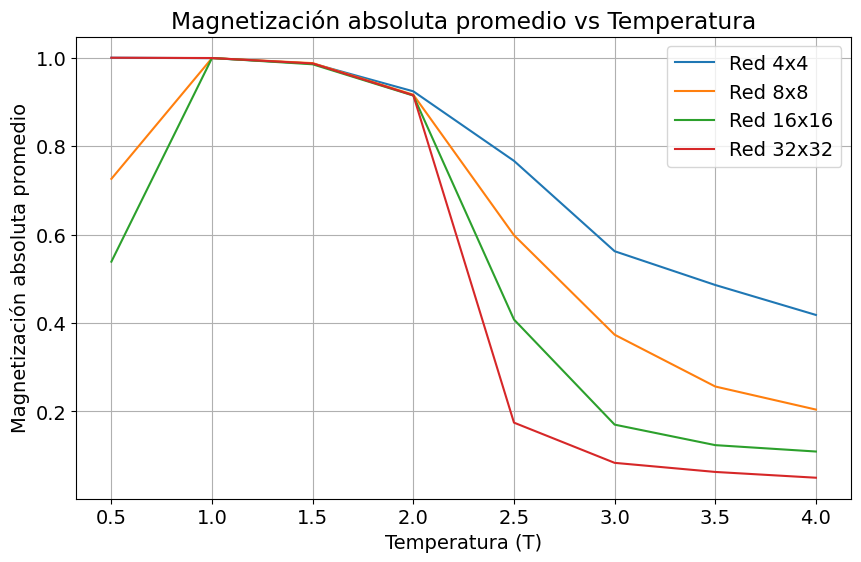

In [8]:


# Parámetros del modelo
temperaturas = np.arange(0.5, 4.5, 0.5)  # Rango de temperaturas de 0.5 a 4.0 en pasos de 0.5
N_sweeps = 1000  # Número de sweeps para equilibrar y tomar muestras
tamaños_red = [4, 8, 16, 32]  # Tamaños de red: 4x4, 8x8, 16x16, 32x32

# Inicialización de la red de espines aleatoria
def inicializar_red(L):
    return np.random.choice([-1, 1], size=(L, L))

# Función para calcular la energía local de un espín con sus vecinos
@jit(nopython=True)
def local_energy(spins, i, j, L):
    return -spins[i, j] * (spins[i, (j+1) % L] + spins[i, (j-1) % L] +
                           spins[(i+1) % L, j] + spins[(i-1) % L, j])

# Algoritmo de Metropolis-Hastings
@jit(nopython=True)
def metropolis(spins, T, L):
    beta = 1 / T
    for _ in range(L**2):  # Intentos por sweep
        i, j = np.random.randint(0, L, size=2)
        dE = -2 * local_energy(spins, i, j, L)  # Cambio de energía al voltear el espín
        if dE < 0 or np.random.rand() < np.exp(-beta * dE):
            spins[i, j] *= -1  # Flip del espín
    return spins

# Función para calcular la magnetización absoluta
@jit(nopython=True)
def calcular_magnetizacion(spins):
    return np.abs(np.sum(spins))  # Suma de espines en valor absoluto

# Medir magnetización promedio
def medir_magnetizacion_promedio(L, N_sweeps, temperaturas):
    magnetizacion_promedio = np.zeros(len(temperaturas))
    
    for t_idx, T in enumerate(temperaturas):
        spins = inicializar_red(L)  # Inicialización fuera del modo nopython
        
        # Fase de equilibración
        for _ in range(10 * L**2):  # Menos sweeps de equilibración
            spins = metropolis(spins, T, L)
        
        # Mediciones
        magnetizacion_accum = 0
        
        for _ in range(N_sweeps):
            spins = metropolis(spins, T, L)
            magnetizacion_accum += calcular_magnetizacion(spins)
        
        # Promedio de la magnetización absoluta
        magnetizacion_promedio[t_idx] = magnetizacion_accum / N_sweeps / (L**2)
    
    return magnetizacion_promedio

# Generar gráficos de magnetización absoluta promedio para diferentes tamaños de red
plt.figure(figsize=(10, 6))

for L in tamaños_red:
    magnetizacion_promedio = medir_magnetizacion_promedio(L, N_sweeps, temperaturas)
    plt.plot(temperaturas, magnetizacion_promedio, label=f'Red {L}x{L}')

# Configuración de los gráficos
plt.title("Magnetización absoluta promedio vs Temperatura")
plt.xlabel("Temperatura (T)")
plt.ylabel("Magnetización absoluta promedio")
plt.legend()
plt.grid(True)
plt.show()


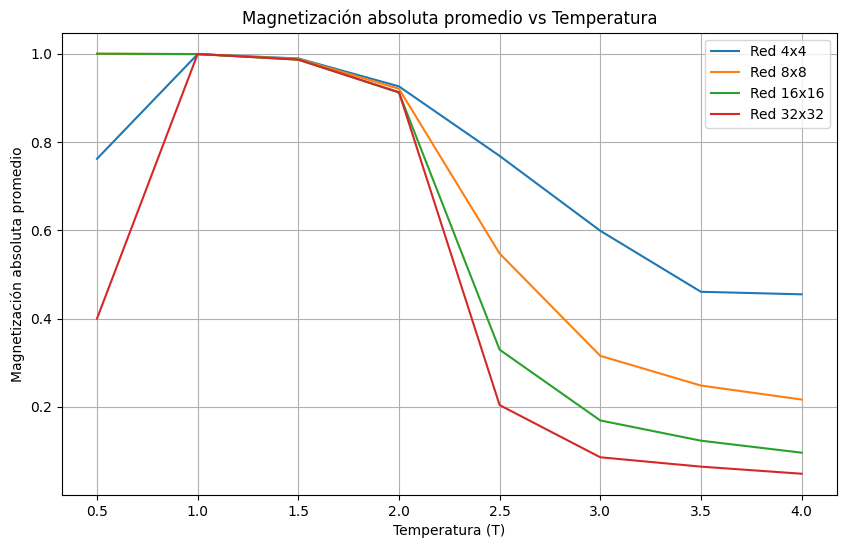

In [2]:


# Parámetros del modelo
temperaturas = np.arange(0.5, 4.5, 0.5)  # Rango de temperaturas de 0.5 a 4.0 en pasos de 0.5
N_sweeps = 1000  # Número de sweeps para equilibrar y tomar muestras
tamaños_red = [4, 8, 16, 32]  # Tamaños de red: 4x4, 8x8, 16x16, 32x32

# Inicialización de la red de espines aleatoria
def inicializar_red(L):
    return np.random.choice([-1, 1], size=(L, L))

# Función para calcular la energía local de un espín con sus vecinos
@jit(nopython=True)
def local_energy(spins, i, j, L):
    return -spins[i, j] * (spins[i, (j+1) % L] + spins[i, (j-1) % L] +
                           spins[(i+1) % L, j] + spins[(i-1) % L, j])

# Algoritmo de Metropolis-Hastings
@jit(nopython=True)
def metropolis(spins, T, L):
    beta = 1 / T
    for _ in range(L**2):  # Intentos por sweep
        i, j = np.random.randint(0, L, size=2)
        dE = -2 * local_energy(spins, i, j, L)  # Cambio de energía al voltear el espín
        if dE < 0 or np.random.rand() < np.exp(-beta * dE):
            spins[i, j] *= -1  # Flip del espín
    return spins

# Función para calcular la magnetización absoluta
@jit(nopython=True)
def calcular_magnetizacion(spins):
    return np.abs(np.sum(spins))  # Suma de espines en valor absoluto

# Medir magnetización promedio
def medir_magnetizacion_promedio(L, N_sweeps, temperaturas):
    magnetizacion_promedio = np.zeros(len(temperaturas))
    
    for t_idx, T in enumerate(temperaturas):
        spins = inicializar_red(L)  # Inicialización fuera del modo nopython
        
        # Fase de equilibración
        for _ in range(10 * L**2):  # Menos sweeps de equilibración
            spins = metropolis(spins, T, L)
        
        # Mediciones
        magnetizacion_accum = 0
        
        for _ in range(N_sweeps):
            spins = metropolis(spins, T, L)
            magnetizacion_accum += calcular_magnetizacion(spins)
        
        # Promedio de la magnetización absoluta
        magnetizacion_promedio[t_idx] = magnetizacion_accum / N_sweeps / (L**2)
    
    return magnetizacion_promedio

# Generar gráficos de magnetización absoluta promedio para diferentes tamaños de red
plt.figure(figsize=(10, 6))

for L in tamaños_red:
    magnetizacion_promedio = medir_magnetizacion_promedio(L, N_sweeps, temperaturas)
    plt.plot(temperaturas, magnetizacion_promedio, label=f'Red {L}x{L}')

# Configuración de los gráficos
plt.title("Magnetización absoluta promedio vs Temperatura")
plt.xlabel("Temperatura (T)")
plt.ylabel("Magnetización absoluta promedio")
plt.legend()
plt.grid(True)
plt.show()